In [97]:
import numpy as np
import Hamilton as hm
import Ansatz as an
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.primitives import Estimator
from qiskit.algorithms import VarQITE
from qiskit.algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple
from qiskit.algorithms import TimeEvolutionProblem
from qiskit.quantum_info import *
import pylab
from qiskit.algorithms import SciPyImaginaryEvolver
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter


## evolution

In [81]:
depth = 4
qubits = 3
hamiltonian = Operator(np.kron(hm.Ham(qubits,1,2),hm.krId(qubits)))
var_principle = ImaginaryMcLachlanPrinciple()
time = 0.4
aux_ops = [hamiltonian]
init_param_values =  [np.pi/2]*qubits + [0]*(depth*qubits*2+qubits)
ansatz = an.ansatz_review_exact(qubits*2,depth)
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
evolution_result = var_qite.evolve(evolution_problem)



KeyboardInterrupt: 

In [ ]:
init_state = Statevector(ansatz.assign_parameters(init_param_values))
evolution_problem = TimeEvolutionProblem(hamiltonian, time, initial_state=init_state, aux_operators=aux_ops)
exact_evol = SciPyImaginaryEvolver(num_timesteps=int(time * 100))
sol = exact_evol.evolve(evolution_problem)

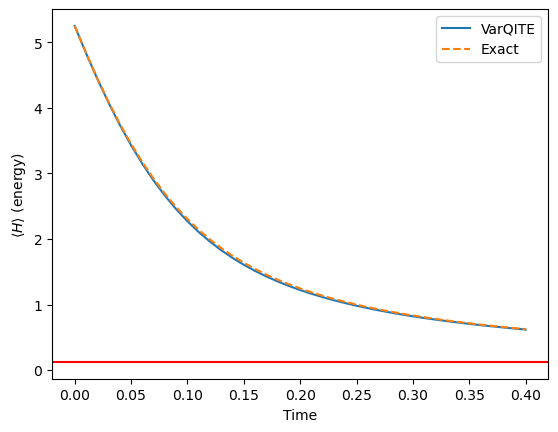

In [83]:
h_exp_val = np.array([ele[0][0] for ele in evolution_result.observables])

exact_h_exp_val = sol.observables[0][0].real

times = evolution_result.times
pylab.plot(times, h_exp_val, label= "VarQITE")
pylab.plot(times, exact_h_exp_val , label= "Exact",  linestyle='--')
plt.axhline(y=0.125, color='r', linestyle='-')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right");

In [117]:
param = evolution_result.parameter_values[int(time*100)][:]
evolved_state = evolution_result.evolved_state
circuit_mes = an.ansatz_review_exact(qubits*2,depth).bind_parameters(param) +measure(6)

CircuitError: 'register size error'

In [ ]:

backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=10000)
result = job.result()
counts = result.get_counts(circuit)#
plot_histogram(counts)

In [ ]:
print(1/((np.trace(np.exp(-4*Ham(2,1,2)))))*np.trace(np.exp(-4*hm.Ham(2,1,2))*hm.Ham(2,1,2)))

In [ ]:
2*(1/4*np.exp(0)+9/4*np.exp(-2*(8/4)))

In [ ]:

dict_1 = evolved_state.probabilities_dict(np.arange(qubits))
x=["1001","1101","1011","1111","1000","1100","1010","1110","0000","0100","0010","0010","0110","0001","0101","0011","0111"]
y=[]
for i in range(len(x)):
    y.append(dict_1[x[i]])

plt.bar(x, y, width=0.9)


In [ ]:
param

In [ ]:
print(theta[:])
print(evolved_state)

In [110]:
an.measu

AttributeError: module 'Ansatz' has no attribute 'measu'

In [66]:
list

{1.5707963267948968: Parameter(θ_10),
 0.5309270953391917: Parameter(θ_1),
 -1.4861224074169633e-17: Parameter(θ_11),
 4.799283621669104e-17: Parameter(θ_12),
 3.4848845074629545e-17: Parameter(θ_13),
 3.8999906987173246e-18: Parameter(θ_14),
 -6.61166830041067e-17: Parameter(θ_15),
 -3.172809193332961e-17: Parameter(θ_16),
 0.3114913476442559: Parameter(θ_17),
 1.0813478640674783e-16: Parameter(θ_18),
 -4.271881811177055e-17: Parameter(θ_19),
 1.9579519703804488e-17: Parameter(θ_2),
 1.1340717253450123e-17: Parameter(θ_20),
 -4.869832121454888e-15: Parameter(θ_21),
 1.1022295064758535e-16: Parameter(θ_22),
 -7.945383098786836e-17: Parameter(θ_23),
 3.5260766971168125e-17: Parameter(θ_24),
 -1.6073276468859638e-17: Parameter(θ_25),
 5.763173577215656e-18: Parameter(θ_26),
 5.726887393391907e-18: Parameter(θ_27),
 -2.141933418332703e-17: Parameter(θ_28),
 3.9350104817734077e-17: Parameter(θ_29),
 2.060319536880976e-17: Parameter(θ_3),
 -3.931567434021853e-18: Parameter(θ_4),
 -4.9921457

In [116]:
def measure(N):
    circuit = QuantumCircuit(N, N)
    circuit.measure(np.arange(int(N / 2)), int(N / 2))
    return circuit

In [105]:
measure(4)